## Importing all needed modules and libraries
---

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import seaborn as sb
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

## Data Description
---

In [3]:
original_data = pd.read_csv("pima-indians-diabetes.csv",header=None)
original_data

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Adding column names

In [4]:
original_data=original_data.rename(columns={0: "Pregnancies", 1: "Glucose", 2 : "Blood Pressure", 3 : "Skin Thickness", 
                                            4 : "Insulin", 5 : "BMI", 6 : "DiabetesPedigreeFunction", 7 : "Age", 
                                            8: "Class"})
original_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
original_data = original_data.astype({"Class":'category'})

In [6]:
print("No. of rows=",original_data.shape[0])
print("No. of columns=",original_data.shape[1])
print()
print("The type of data in each column is")
original_data.dtypes

No. of rows= 768
No. of columns= 9

The type of data in each column is


Pregnancies                    int64
Glucose                        int64
Blood Pressure                 int64
Skin Thickness                 int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Class                       category
dtype: object

In [7]:
for i in original_data.columns:
    print(original_data[i].describe())
    print()


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Blood Pressure, dtype: float64

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: Skin Thickness, dtype: float64

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

count    768.000000
mean   

### Here we see that we have 8 attributes (all numerical type) and 1 target attribute. Now we shall see how many classes is in the target column.

In [8]:
set(list(original_data.iloc[:,-1]))

{0, 1}

### As we see, this will be a binary classification problem. 

# Data Visualizing
---

### Histograms 

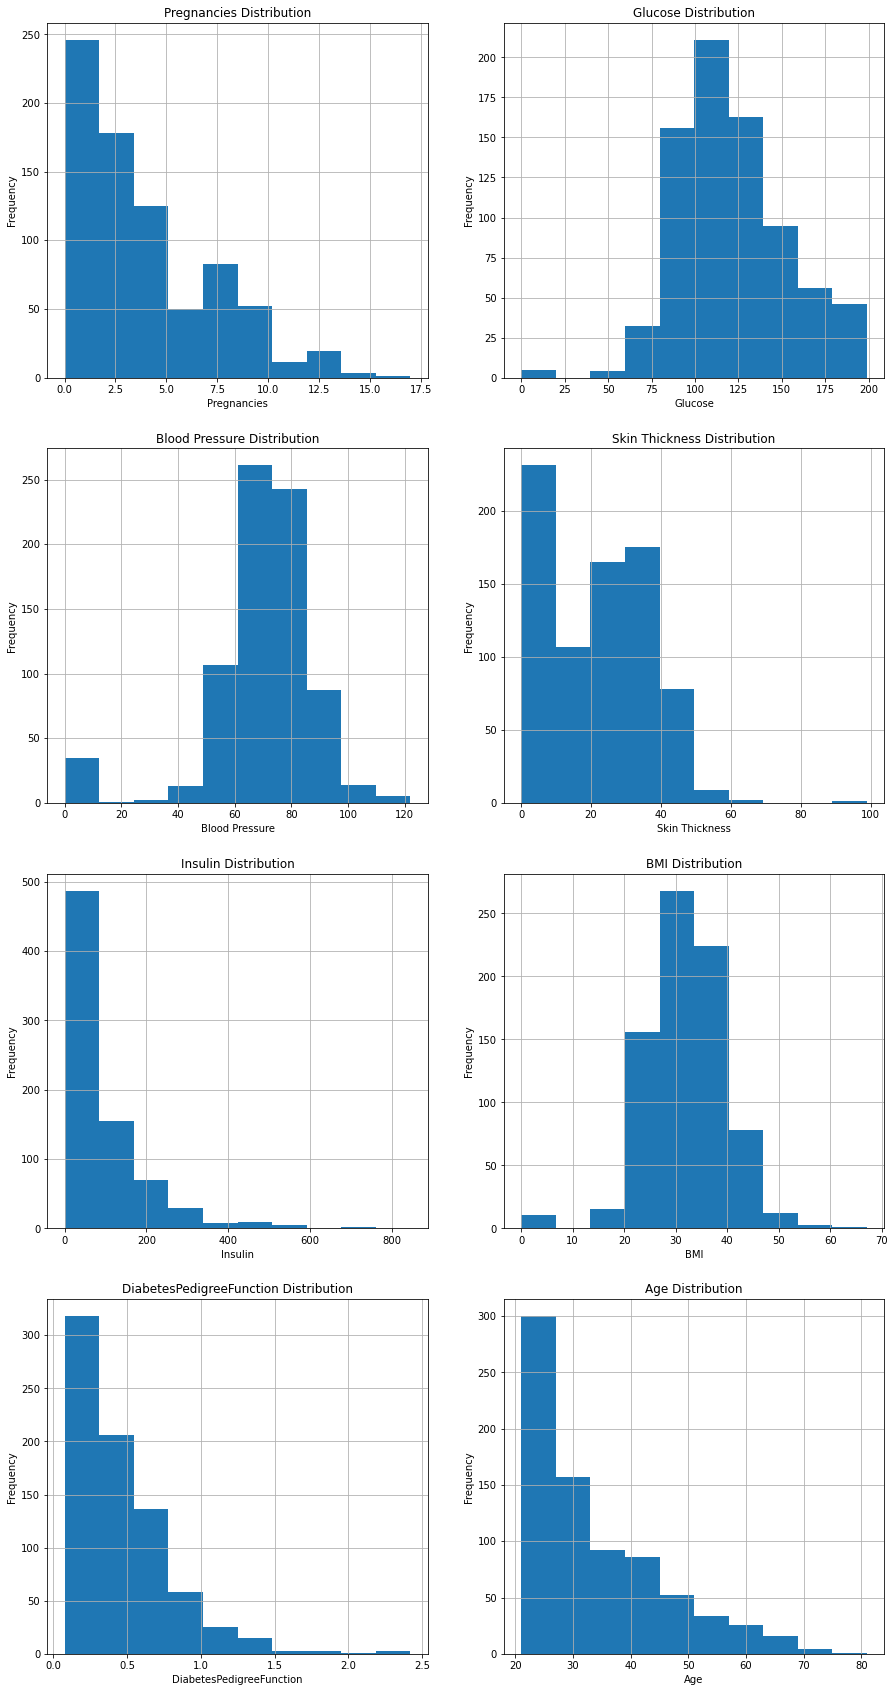

In [9]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    original_data[original_data.columns[i]].hist(bins=10,ax=ax)
    ax.set_xlabel(original_data.columns[i])
    ax.set_ylabel("Frequency")
    ax.set_title(original_data.columns[i] + " Distribution")

### Plots

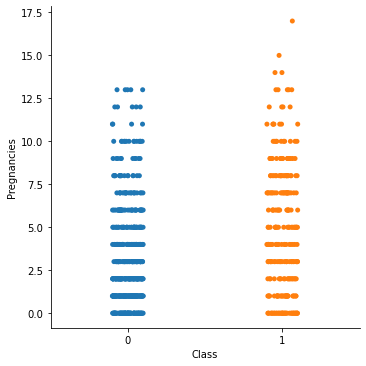

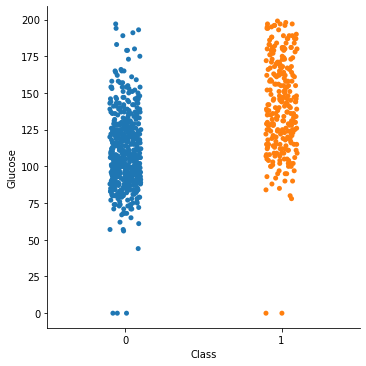

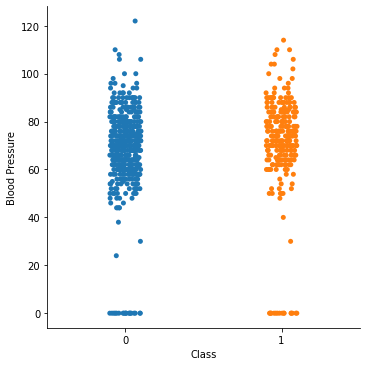

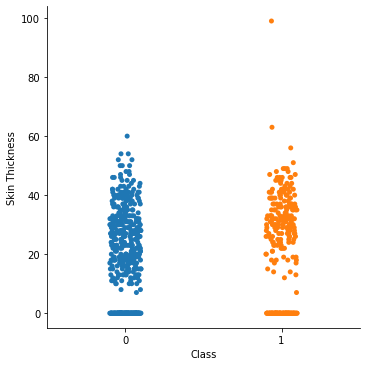

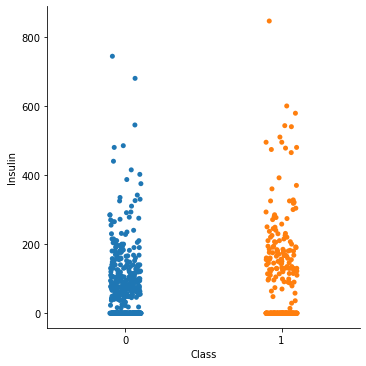

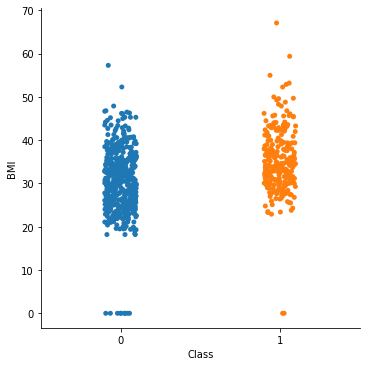

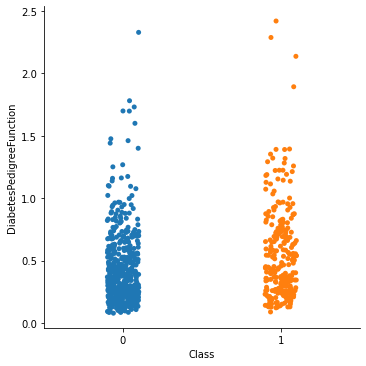

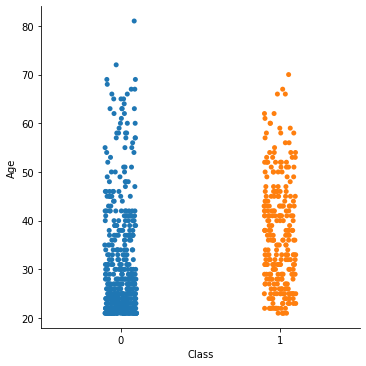

In [10]:
ax=sb.catplot(x="Class", y=original_data.columns[0], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[1], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[2], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[3], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[4], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[5], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[6], data=original_data)
ax=sb.catplot(x="Class", y=original_data.columns[7], data=original_data)

### As we can see, there are many outliers in the data. (BMI, SkinThickness, Insulin and glucose cannot be zero). Thus outlier detection would have to be done.

### We seperate out the features and the target

In [11]:
features=original_data.iloc[:,:-1]
target=original_data.iloc[:,-1]

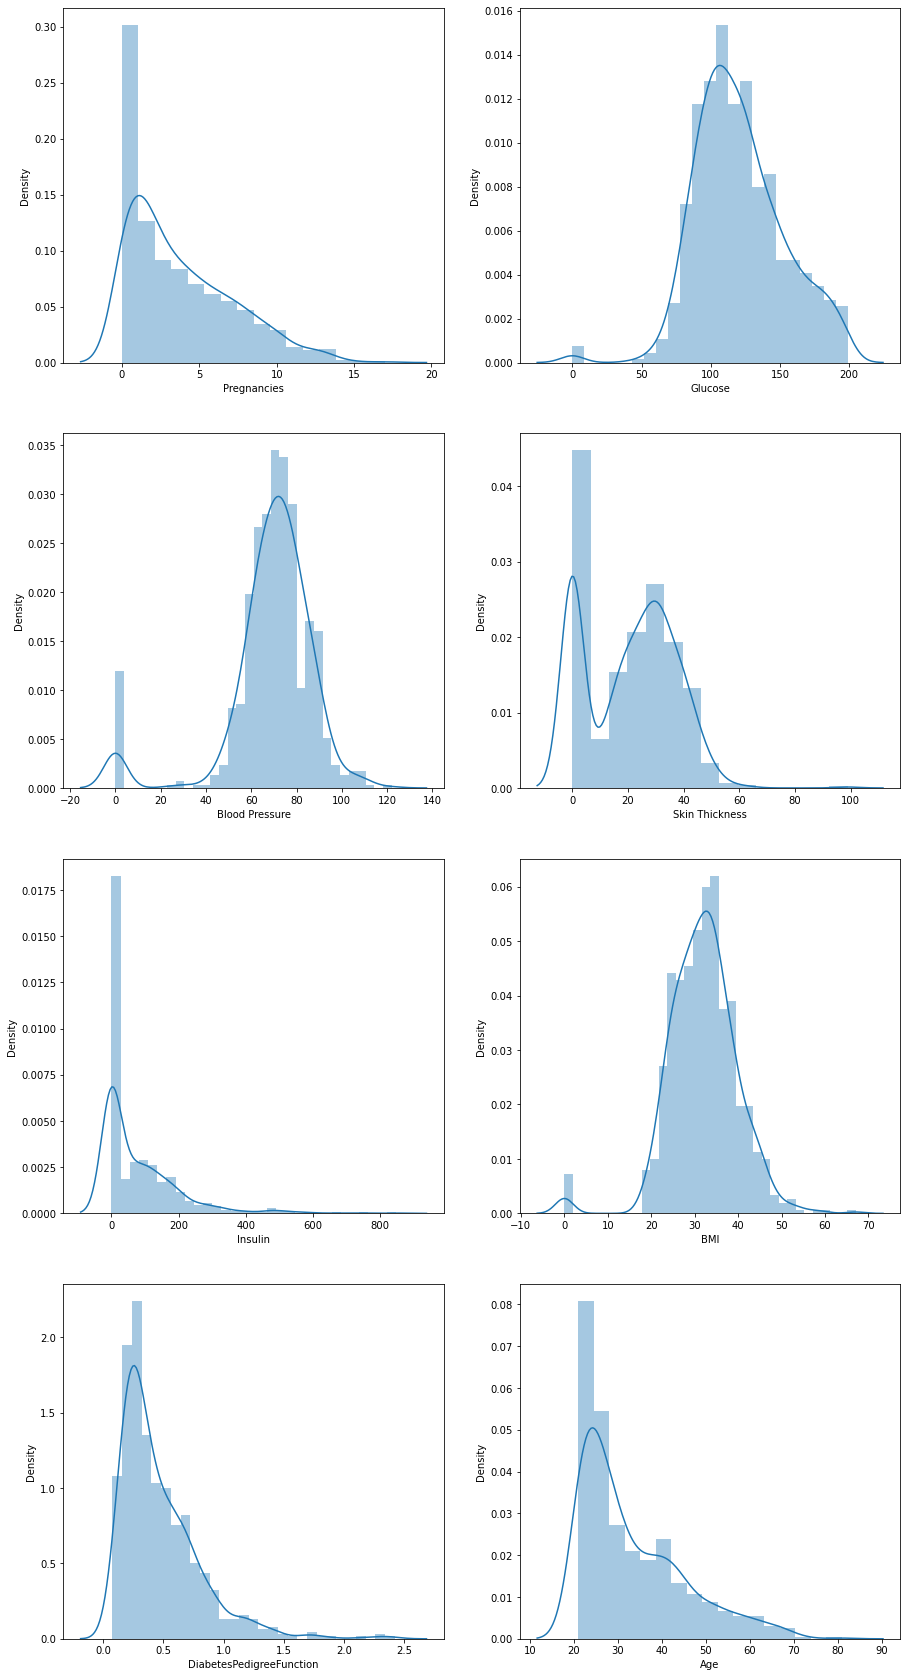

In [12]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.scatterplot(features[features.columns[i]])


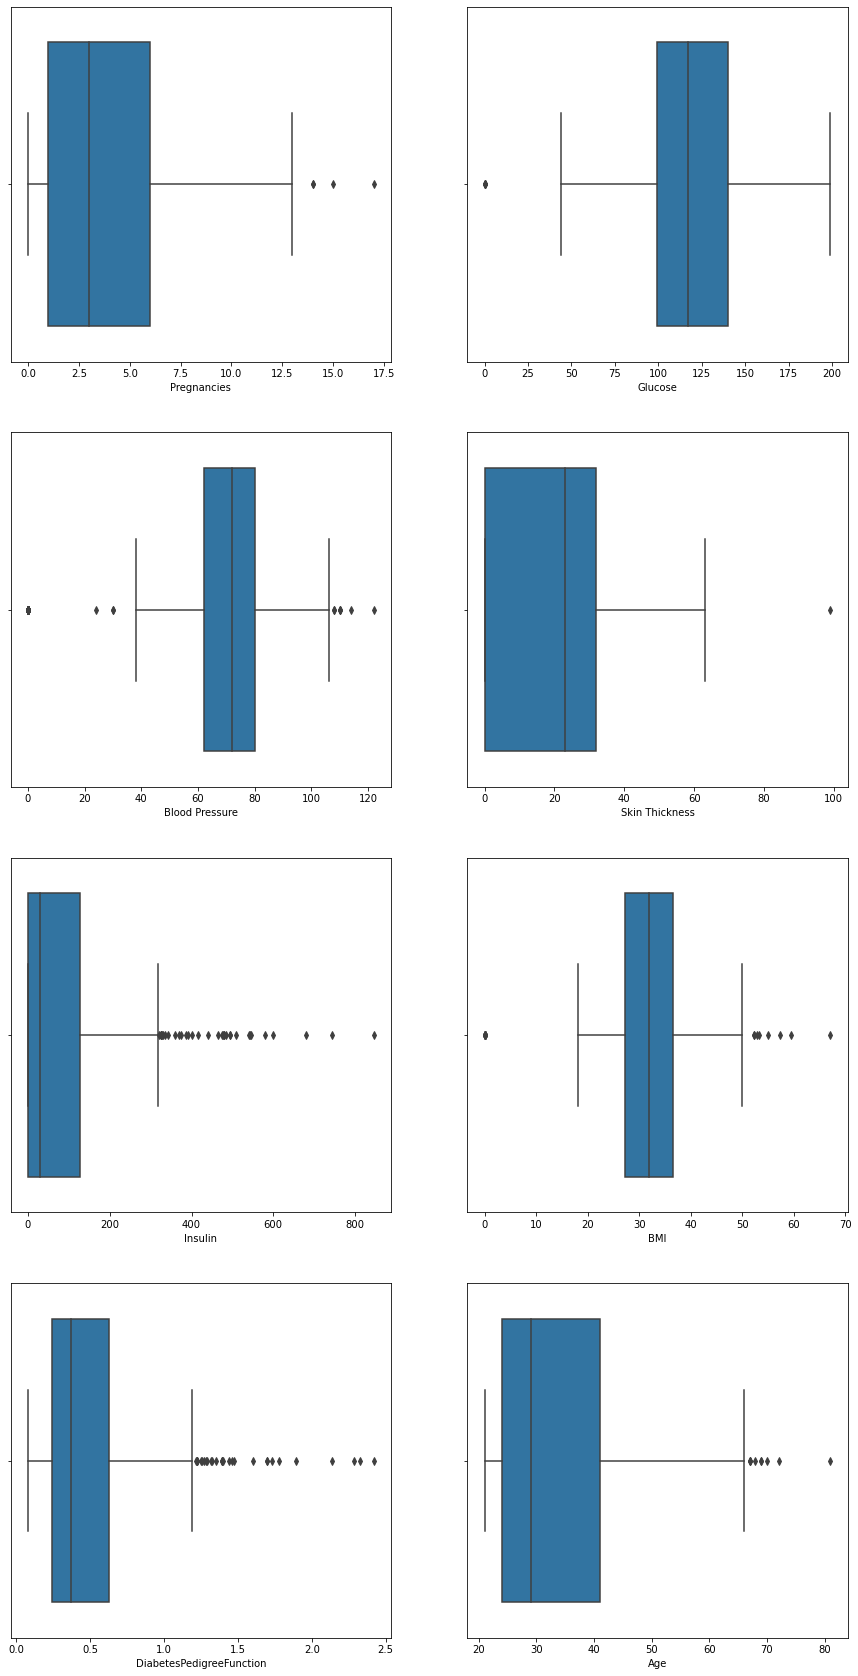

In [13]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features[features.columns[i]])


## Data Preprocessing
---

### We check null entries

#### The dataset has no Nan values but there are null values. As we can see there are some columns which cannot have the value zero like skin thickness, glucose, insulin, BMI. All these entries are null entries and thus needed to be treated like null values

In [14]:
features_nan=features.copy()
colswithzero=['Glucose',"Blood Pressure","Skin Thickness","Insulin","BMI"]
for i in colswithzero:
    features_nan[i] = features_nan[i].replace({0:np.nan})


In [15]:
for i in features_nan.columns:
    print (i," - ",features_nan[i].isnull().sum())

Pregnancies  -  0
Glucose  -  5
Blood Pressure  -  35
Skin Thickness  -  227
Insulin  -  374
BMI  -  11
DiabetesPedigreeFunction  -  0
Age  -  0


#### To handle null values, we will take 3 aproaches

### 1st Approach
#### Drop all records with missing Glucose, Blood Pressure and BMI and using interpolate for Skin Thickenss and Insulin

In [16]:
features1=features_nan.copy()
features1.dropna(axis=0,how='any',subset=['Glucose','Blood Pressure','BMI'], inplace=True)
features1=features1.interpolate(limit_direction='both')

notdropped=[]
total=[]
target1=target.copy()
for i,j in features1.iterrows():
    notdropped.append(i)
for i in range(len(target1)):
    total.append(i)
d=set(total)-set(notdropped)
for i in d:
    target1.drop(i,axis=0,inplace=True)


features1


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,146.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,27.0,112.0,30.1,0.349,47


In [17]:
for i in features1.columns:
    print (i," - ",features1[i].isnull().sum())

Pregnancies  -  0
Glucose  -  0
Blood Pressure  -  0
Skin Thickness  -  0
Insulin  -  0
BMI  -  0
DiabetesPedigreeFunction  -  0
Age  -  0


### 2nd Approach
#### Replace missing values for Glucose, Blood Pressure and BMI with the mean and interpolate values for Insulin and Skin Thickness. 

In [18]:
features2=features_nan.copy()
features2['Glucose'].fillna(features2['Glucose'].mean(), inplace=True)
features2['Blood Pressure'].fillna(features2['Blood Pressure'].mean(), inplace=True)
features2['BMI'].fillna(features2['BMI'].mean(), inplace=True)
features2=features2.interpolate(limit_direction='both')

notdropped=[]
total=[]
target2=target.copy()
for i,j in features2.iterrows():
    notdropped.append(i)
for i in range(len(target2)):
    total.append(i)
d=set(total)-set(notdropped)
for i in d:
    target2.drop(i,axis=0,inplace=True)


features2

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,146.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,27.0,112.0,30.1,0.349,47


In [19]:
for i in features2.columns:
    print (i," - ",features2[i].isnull().sum())

Pregnancies  -  0
Glucose  -  0
Blood Pressure  -  0
Skin Thickness  -  0
Insulin  -  0
BMI  -  0
DiabetesPedigreeFunction  -  0
Age  -  0


###  3rd Approach
#### Interpolate all values

In [20]:
features3=features_nan.copy()
features3=features3.interpolate(limit_direction='both')

notdropped=[]
total=[]
target3=target.copy()
for i,j in features3.iterrows():
    notdropped.append(i)
for i in range(len(target3)):
    total.append(i)
d=set(total)-set(notdropped)
for i in d:
    target3.drop(i,axis=0,inplace=True)


features3

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31
2,8,183.0,64.0,26.0,94.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,146.0,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,27.0,112.0,30.1,0.349,47


In [21]:
for i in features3.columns:
    print (i," - ",features3[i].isnull().sum())

Pregnancies  -  0
Glucose  -  0
Blood Pressure  -  0
Skin Thickness  -  0
Insulin  -  0
BMI  -  0
DiabetesPedigreeFunction  -  0
Age  -  0


#### Our data now has no null values.

### Outlier detection and removal
https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
https://www.asc.ohio-state.edu/goel.1//STATLEARN/PROJECTS/Presentations/Diabetes_PimaIndians.pdf

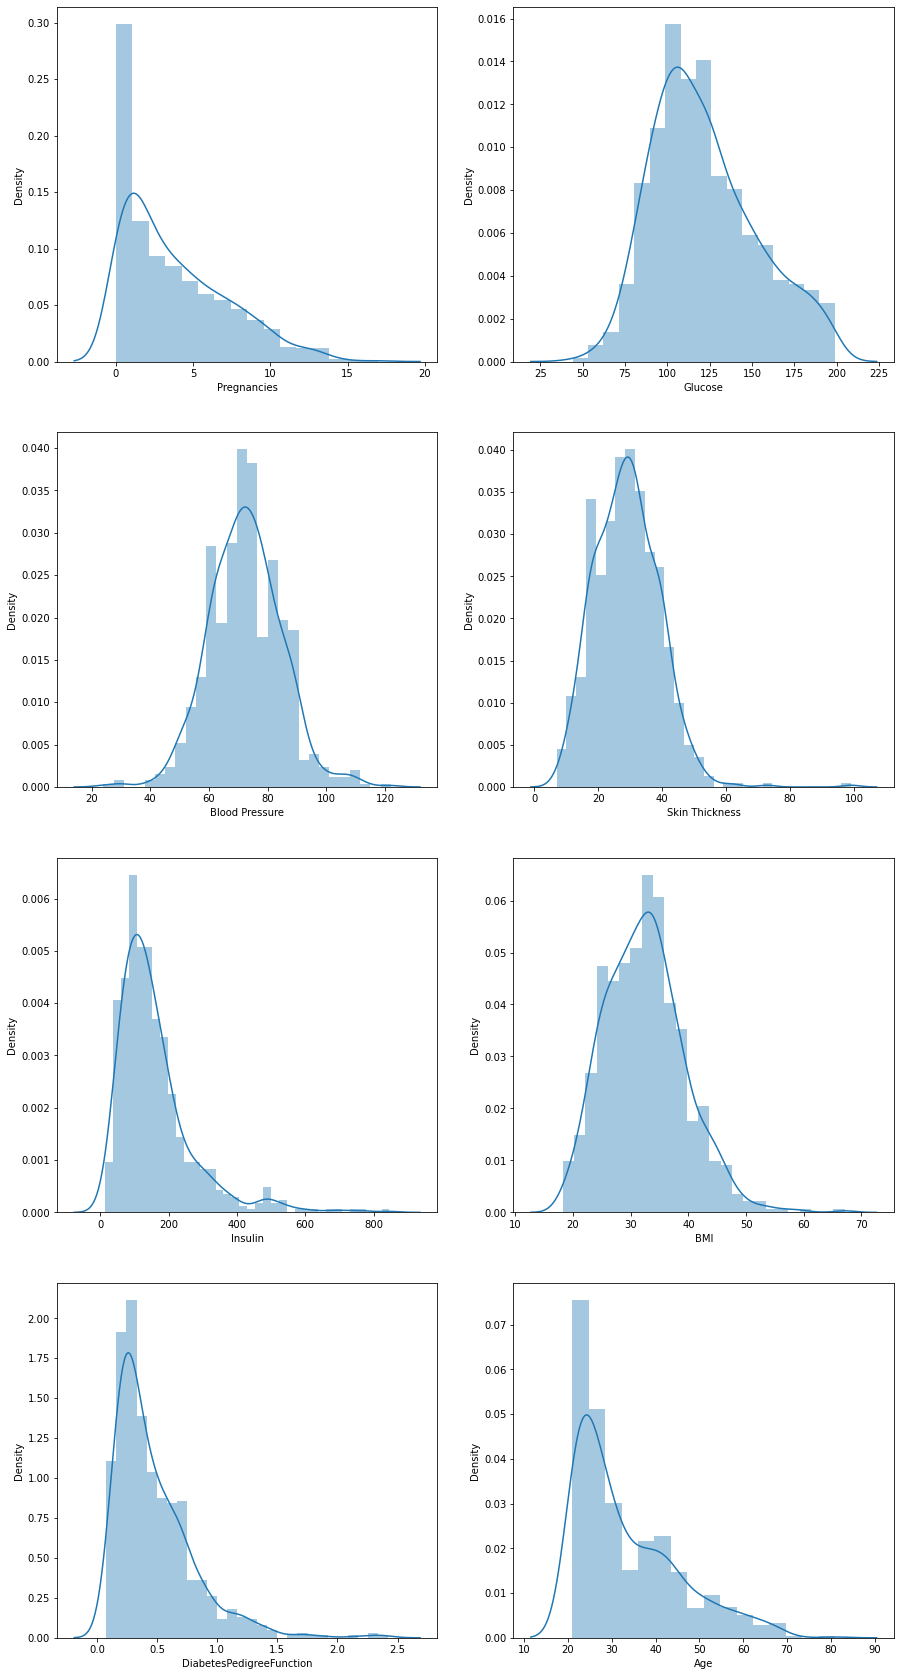

In [22]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.distplot(features1[features1.columns[i]])


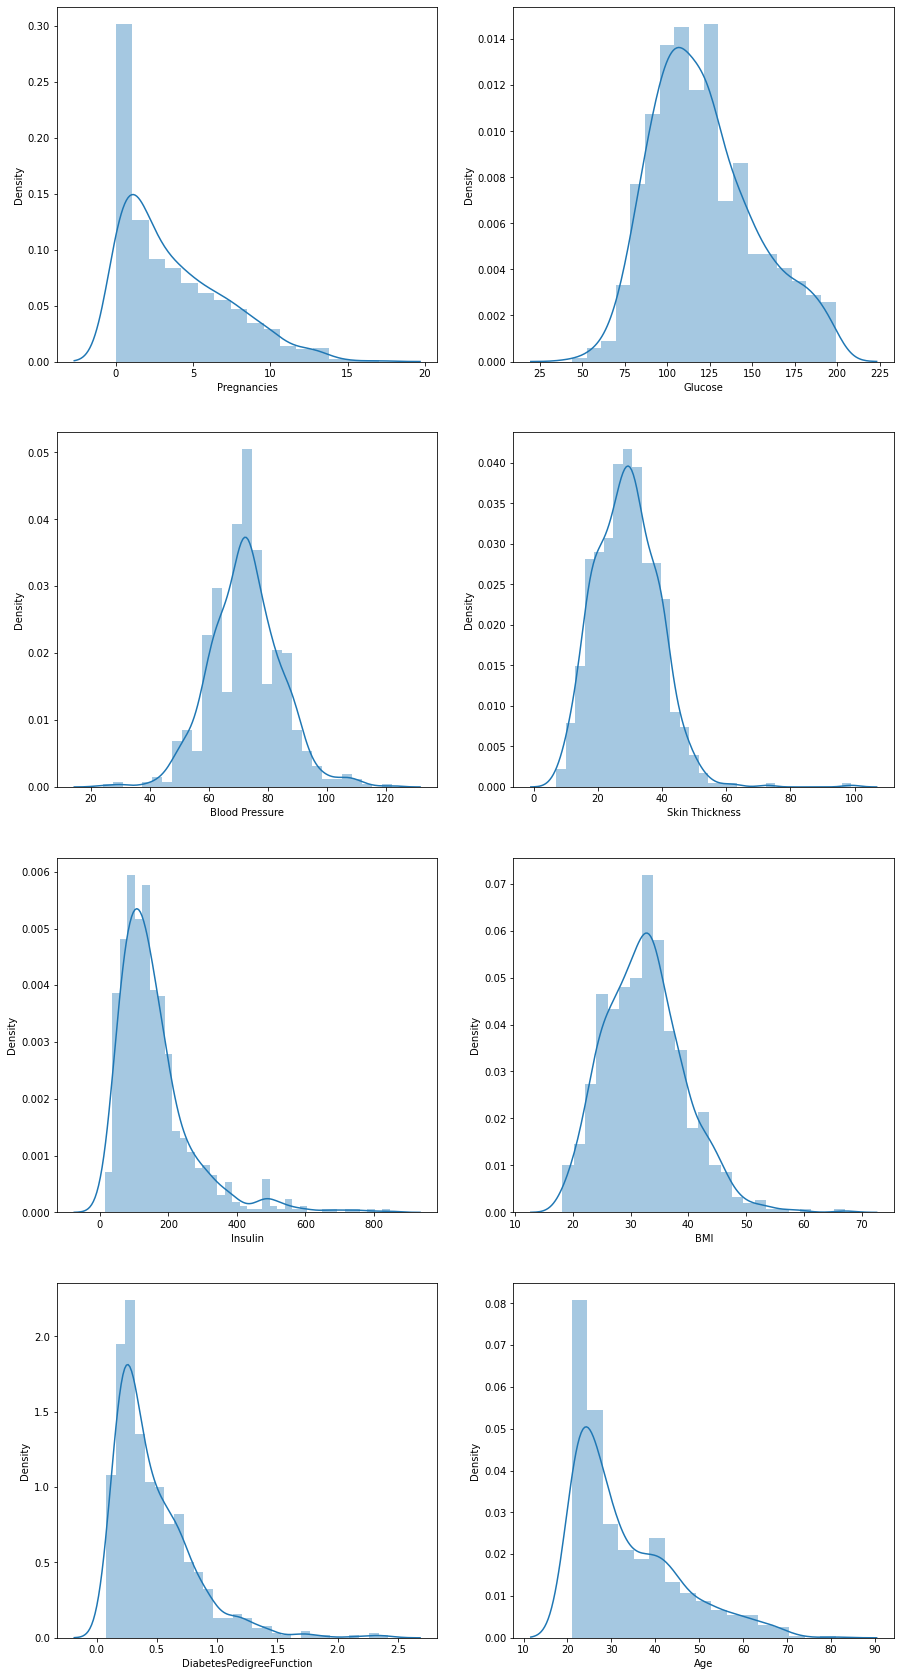

In [23]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.distplot(features2[features2.columns[i]])

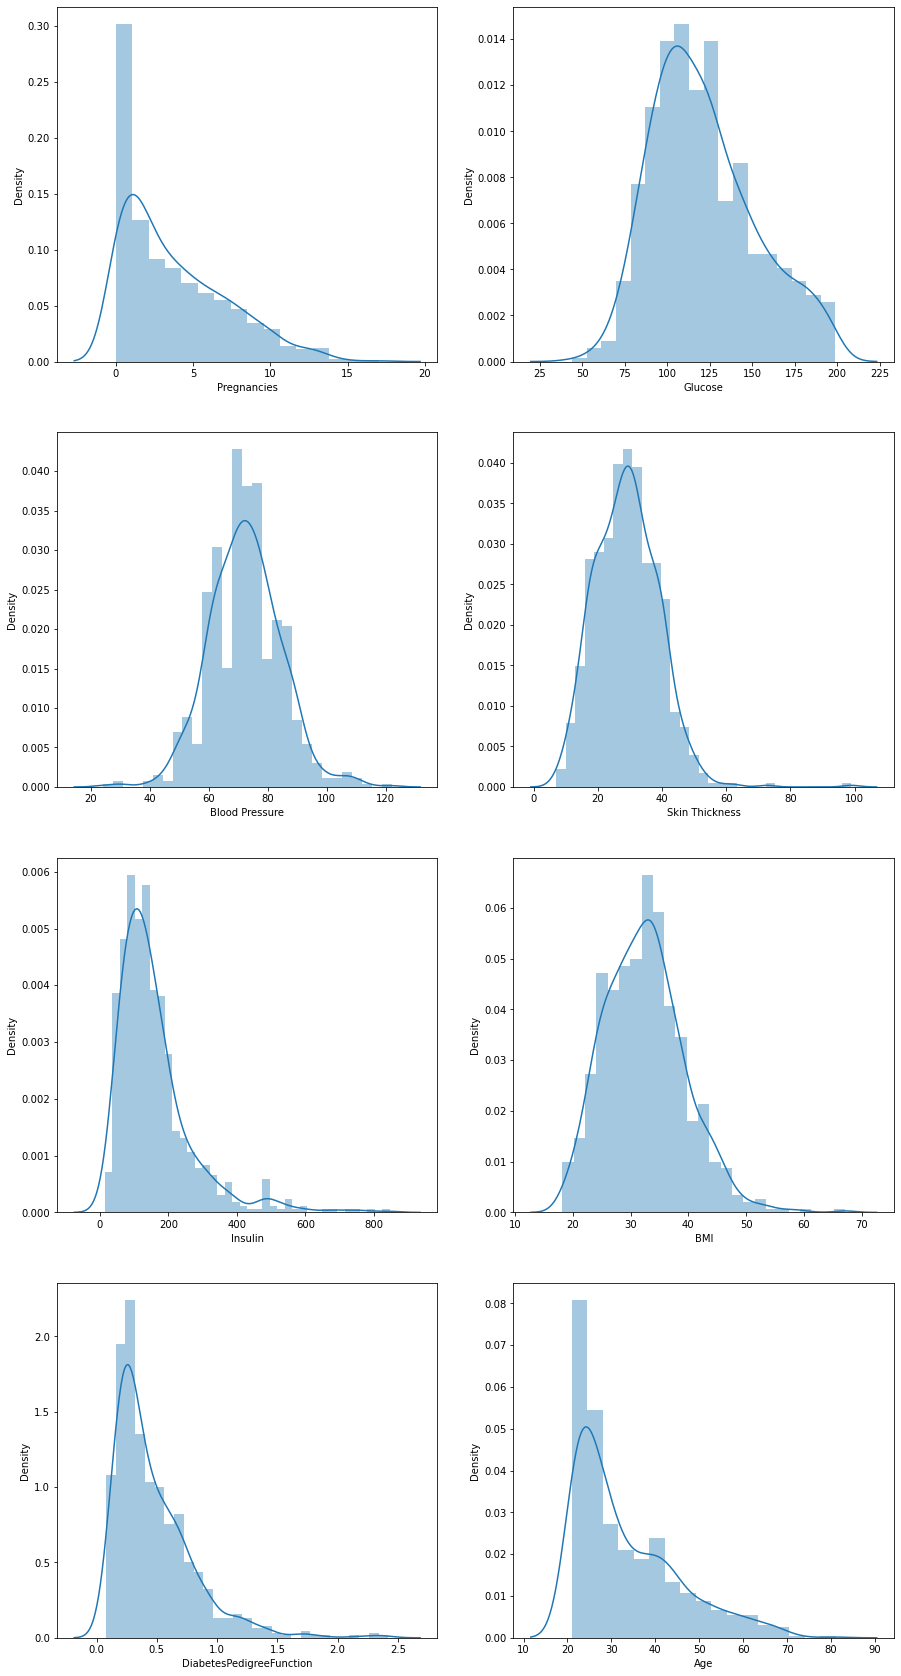

In [24]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.distplot(features3[features3.columns[i]])

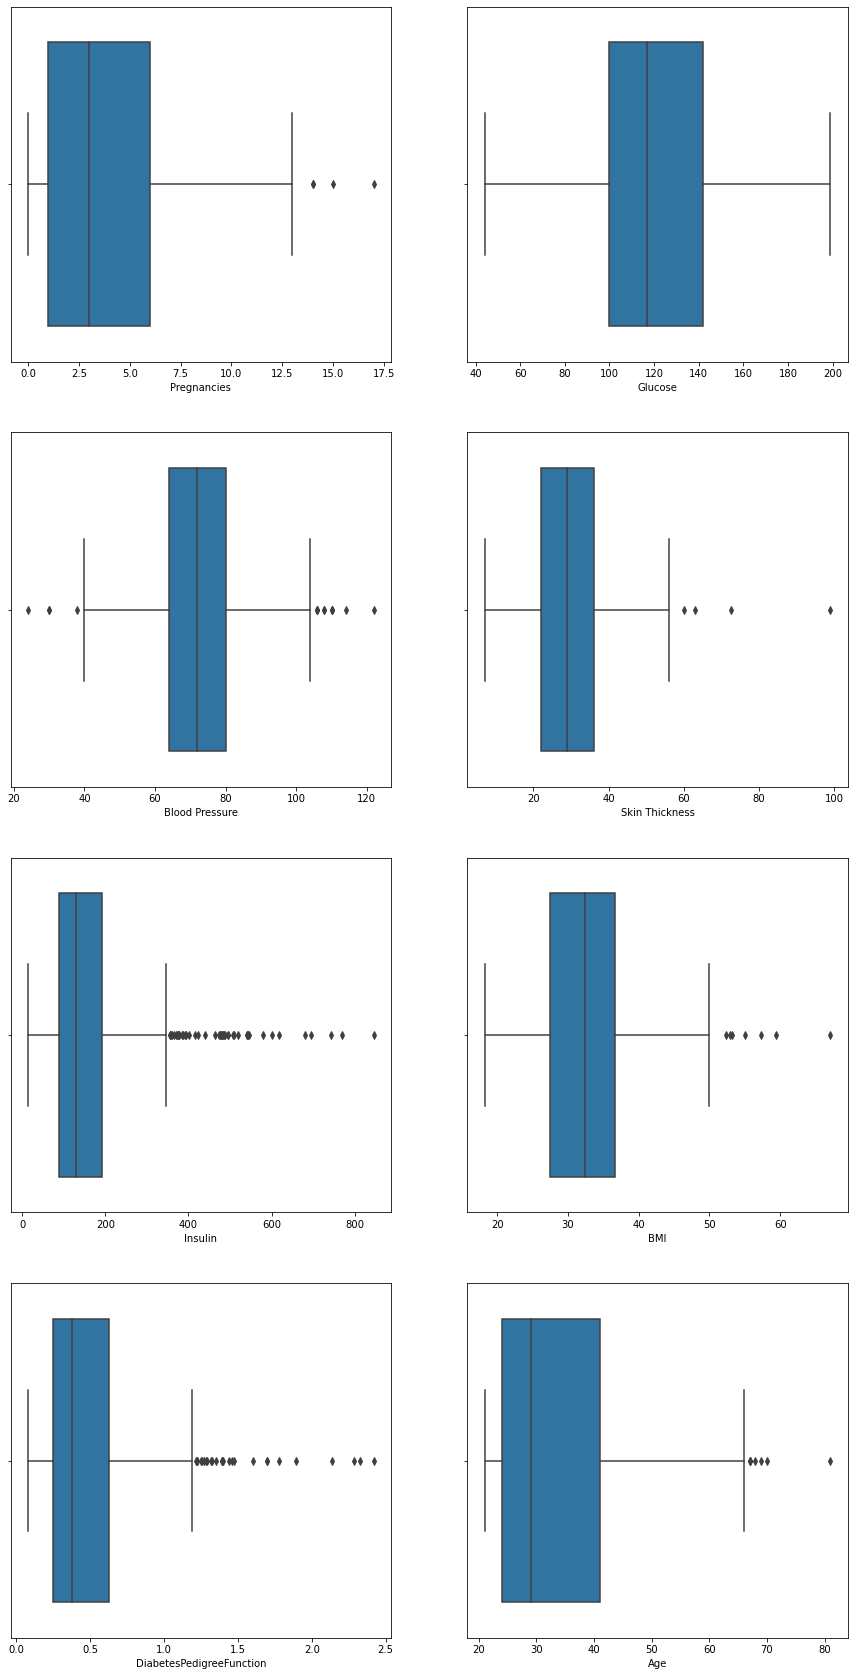

In [25]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features1[features1.columns[i]])


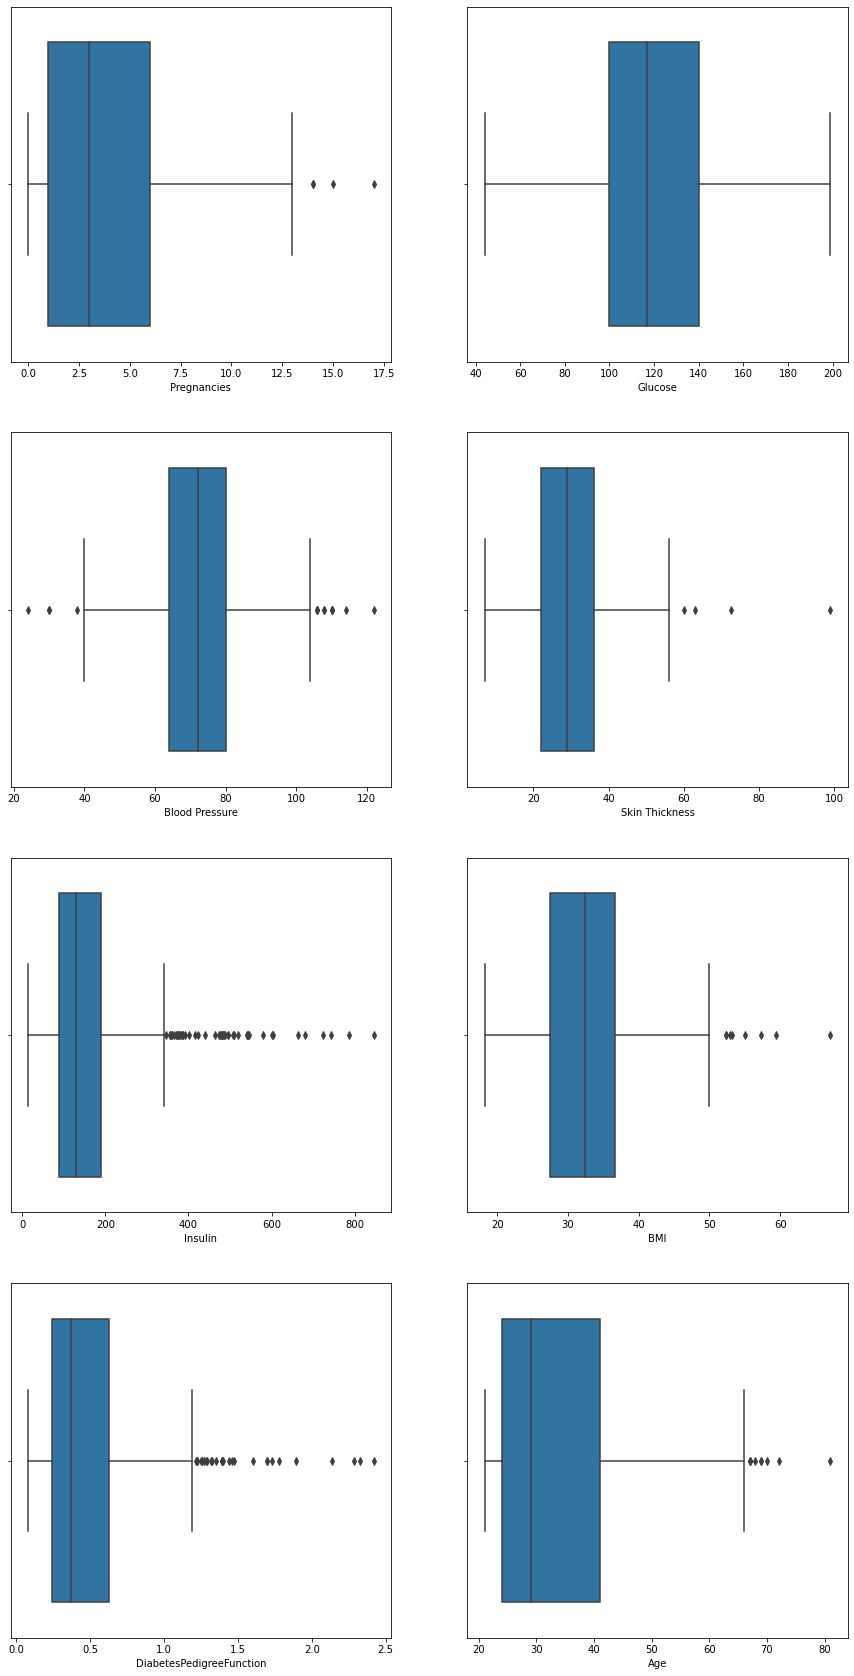

In [26]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features2[features2.columns[i]])


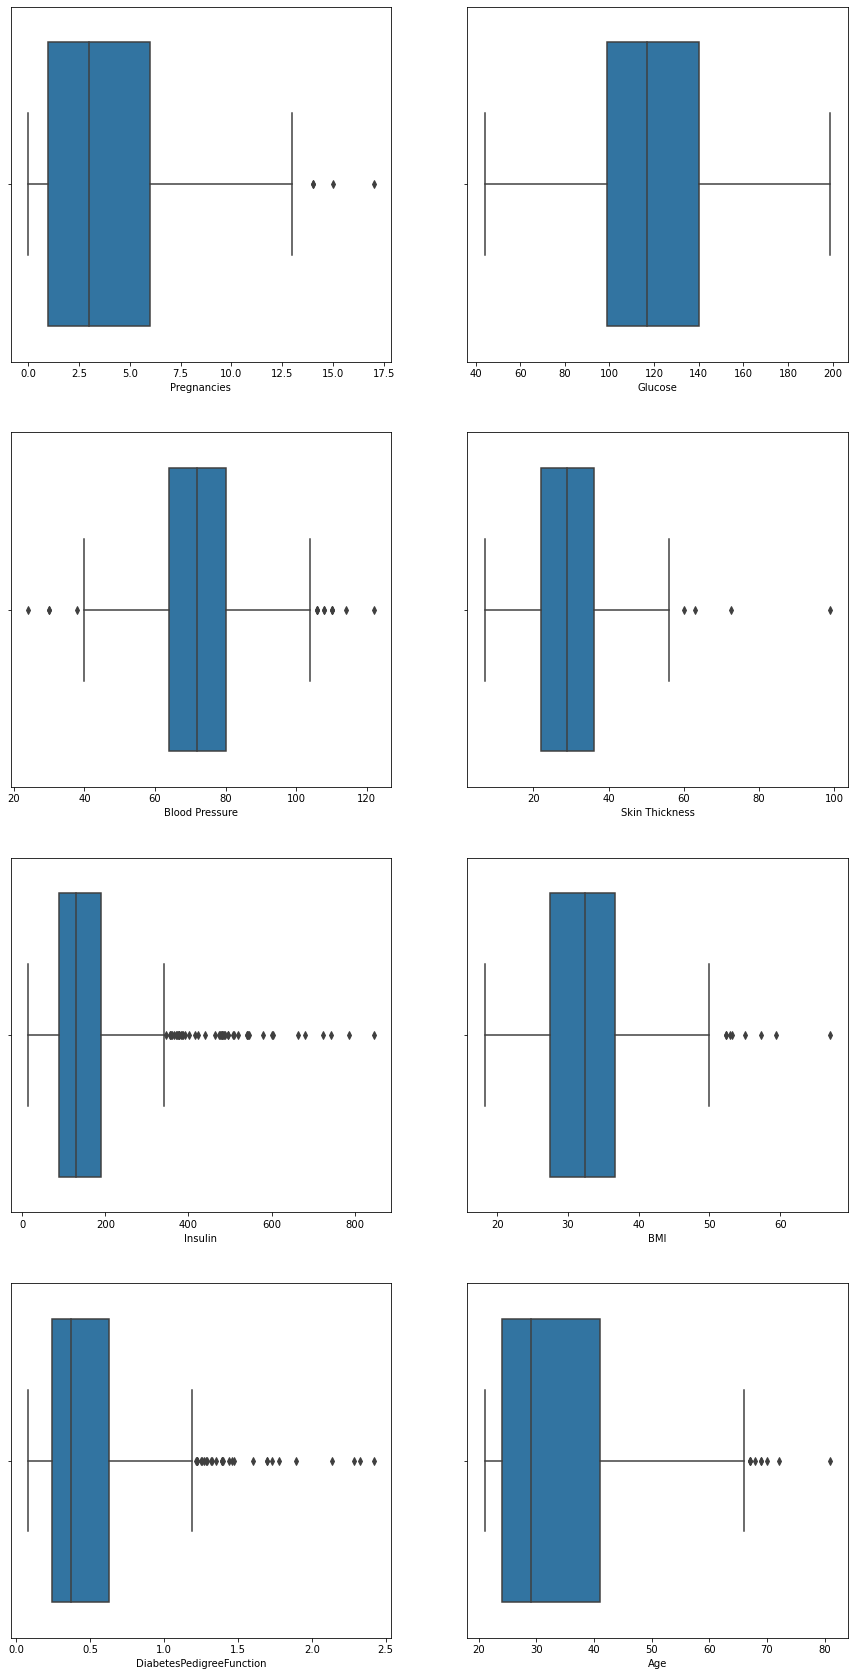

In [27]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features3[features3.columns[i]])


#### To remove outliers, we will employ IQR filtering.


In [28]:
for i in features1.columns:
    q25=features1[i].quantile(0.25)
    q75=features1[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in features1.iterrows():
        if features1[i][j]>high:
            features1.at[j,i]=high
        if features1[i][j]<low:
            features1.at[j,i]=low

for i in features2.columns:
    q25=features2[i].quantile(0.25)
    q75=features2[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in features2.iterrows():
        if features2[i][j]>high:
            features2.at[j,i]=high
        if features2[i][j]<low:
            features2.at[j,i]=low

print()

for i in features3.columns:
    q25=features3[i].quantile(0.25)
    q75=features3[i].quantile(0.75)
    iqr=q75-q25
    high=q75+1.5*iqr
    low=q25-1.5*iqr
    for j,k in features3.iterrows():
        if features3[i][j]>high:
            features3.at[j,i]=high
        if features3[i][j]<low:
            features3.at[j,i]=low

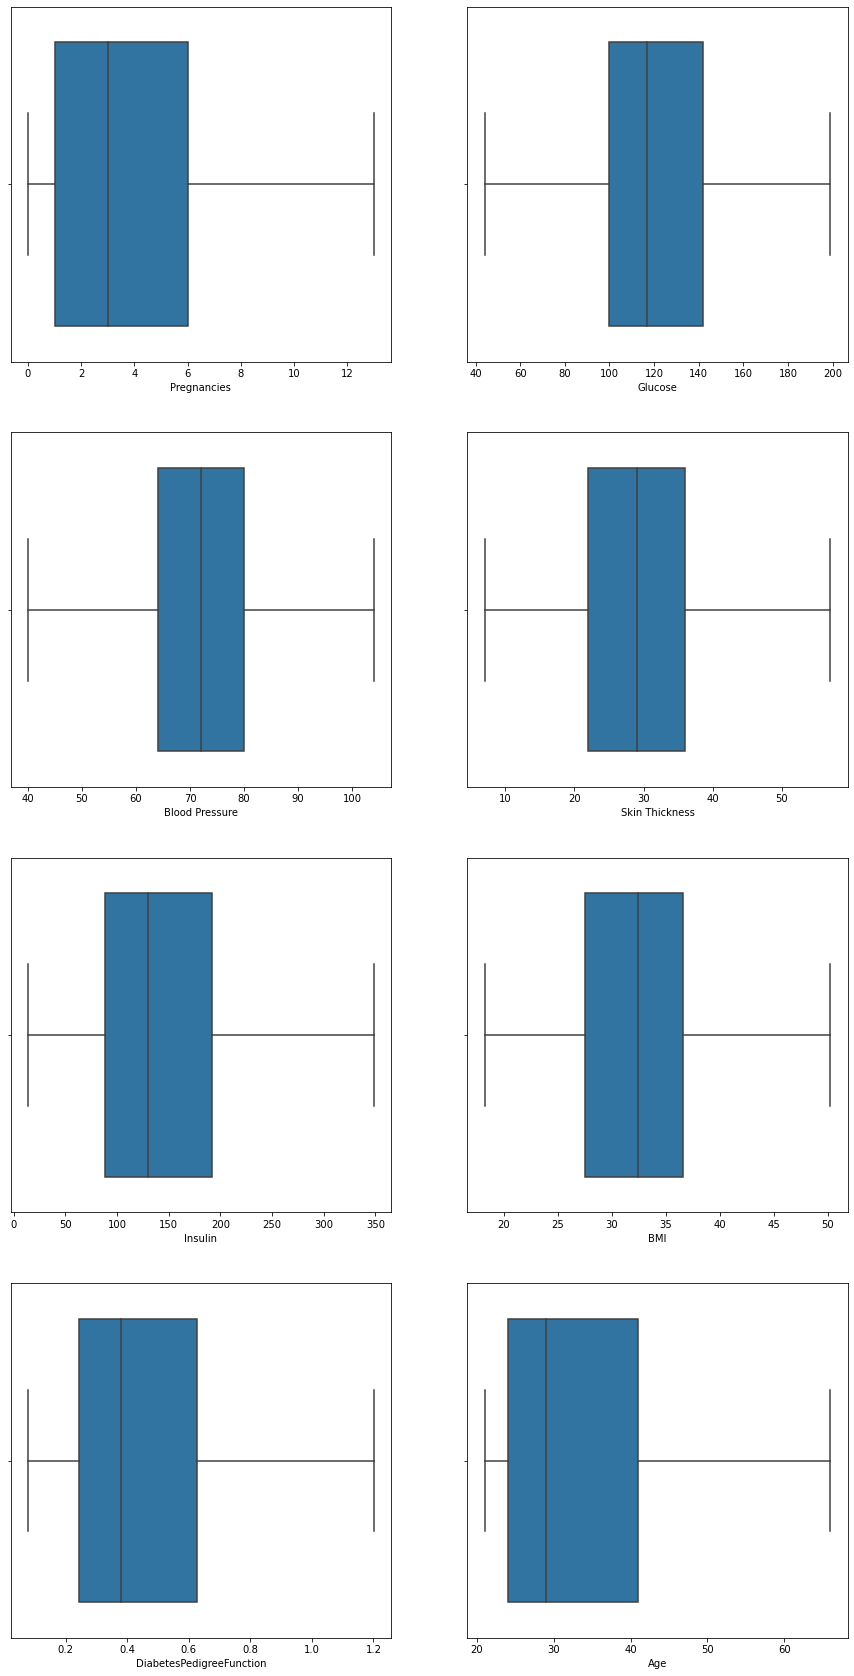

In [29]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features1[features1.columns[i]])

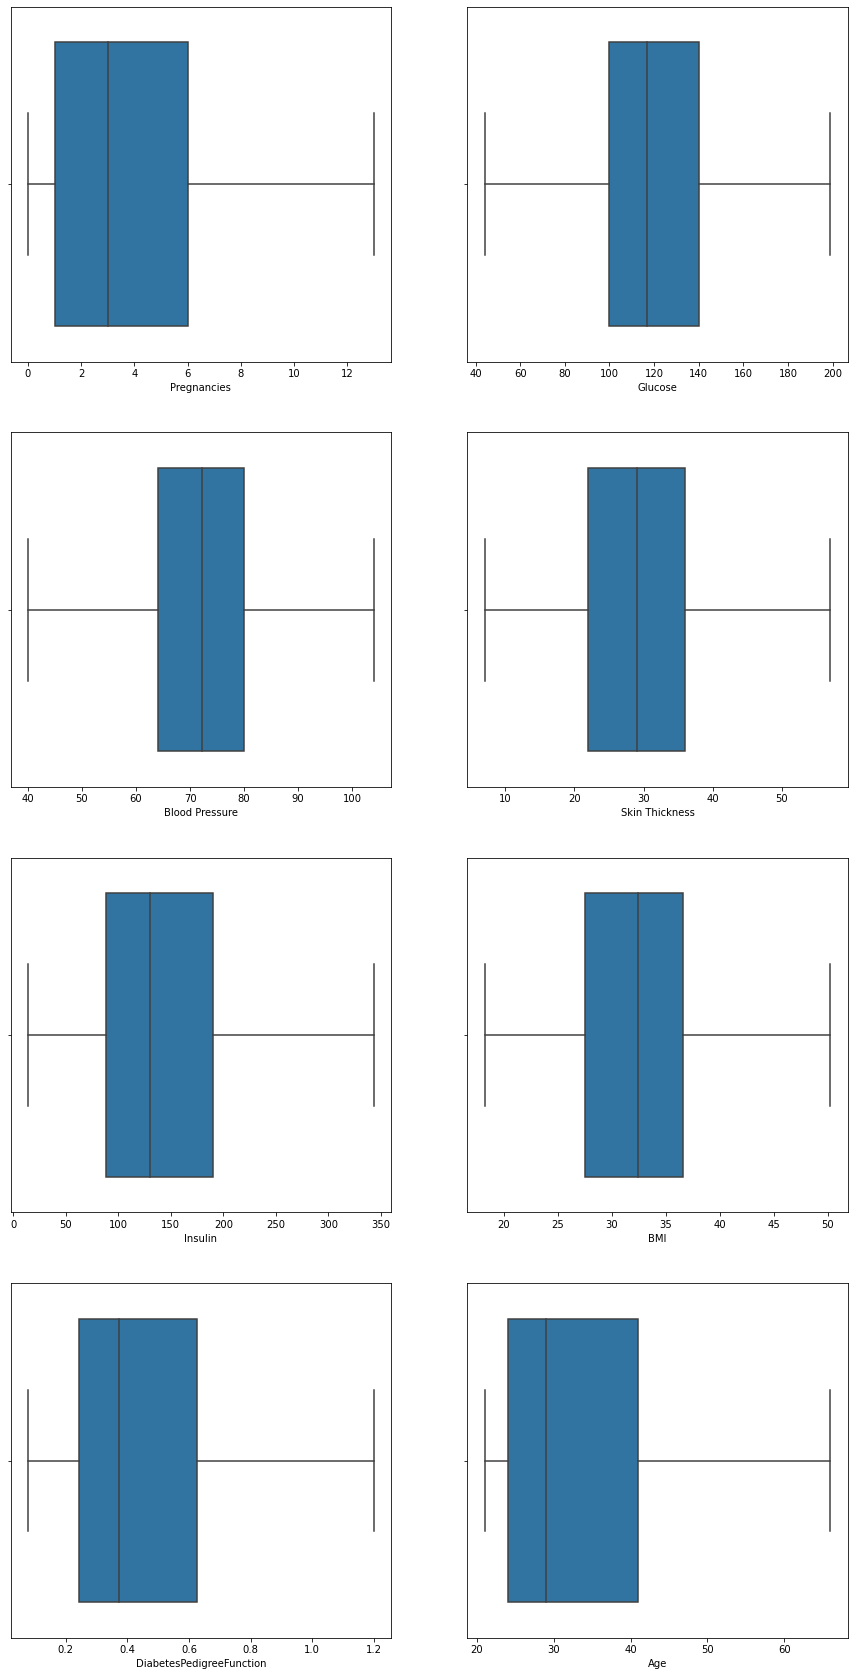

In [30]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features2[features2.columns[i]])

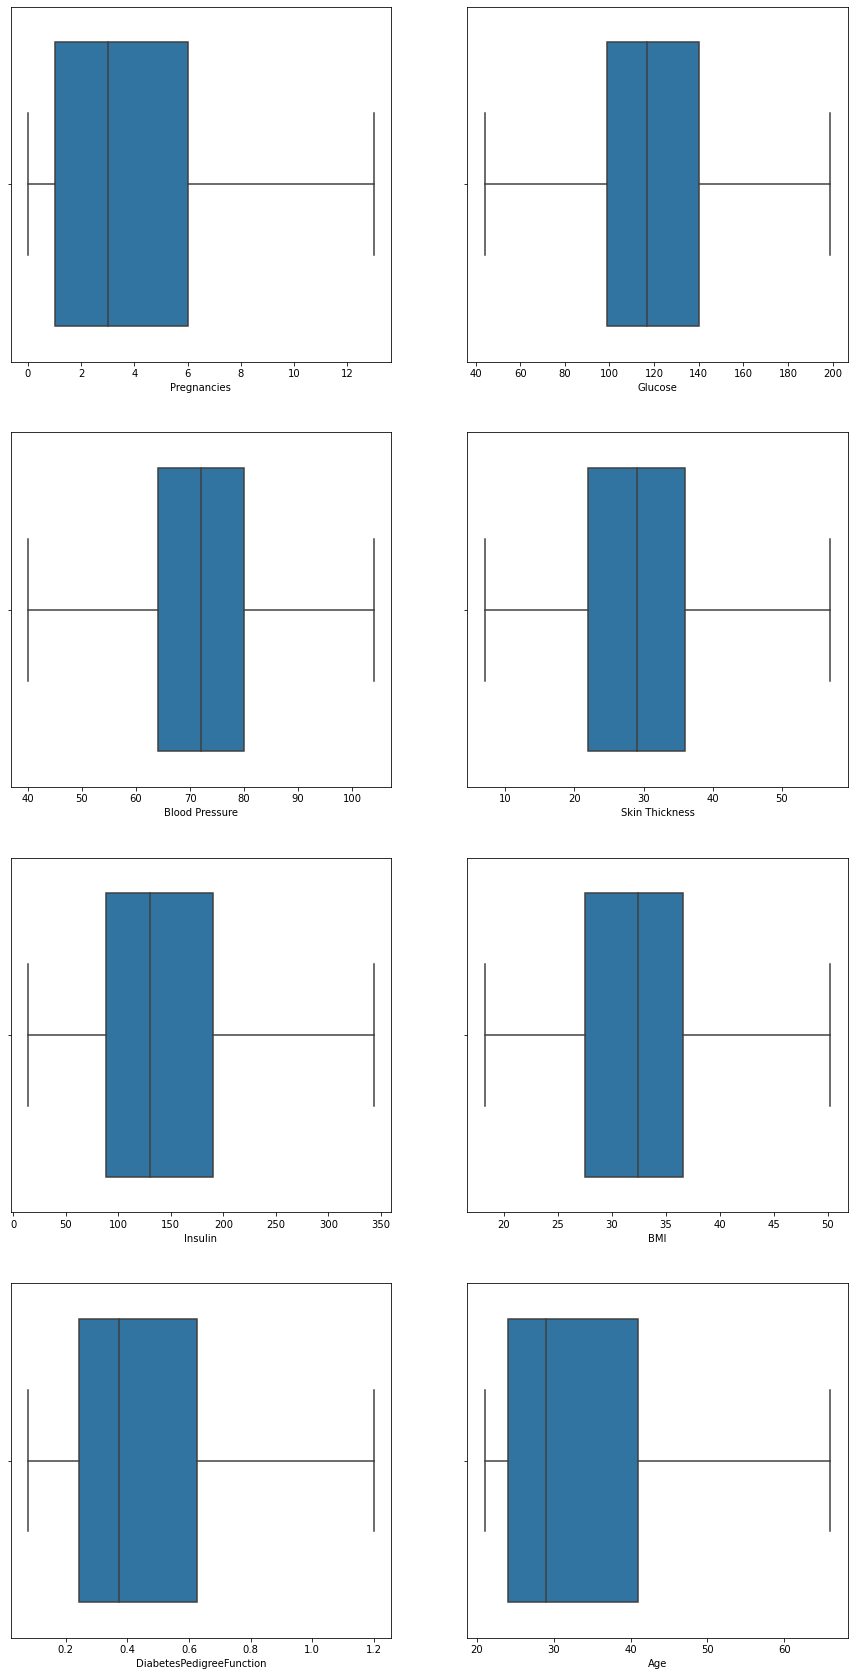

In [31]:
fig=mp.figure(figsize=(15, 30))
for i in range(8):
    ax=fig.add_subplot(4,2,i+1)
    sb.boxplot(features3[features3.columns[i]])

### Data Normalization


In [32]:
features1=pd.DataFrame(preprocessing.normalize(features1))
features1=features1.rename(columns={0: "Pregnancies", 1: "Glucose", 2 : "Blood Pressure", 3 : "Skin Thickness", 
                                    4 : "Insulin", 5 : "BMI", 6 : "DiabetesPedigreeFunction", 7 : "Age"})
features1

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.029699,0.732580,0.356390,0.173245,0.465288,0.166316,0.003104,0.247493
1,0.006604,0.561357,0.435877,0.191522,0.620794,0.175672,0.002318,0.204730
2,0.036241,0.829011,0.289927,0.117783,0.425831,0.105552,0.003044,0.144964
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596408,0.174134,0.152367,0.731361,0.187629,0.005229,0.143660
...,...,...,...,...,...,...,...,...
719,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
720,0.009544,0.582166,0.334030,0.128840,0.696690,0.175604,0.001622,0.128840
721,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
722,0.005280,0.665326,0.316822,0.142570,0.591401,0.158939,0.001843,0.248177


In [33]:
features2=pd.DataFrame(preprocessing.normalize(features2))
features2=features2.rename(columns={0: "Pregnancies", 1: "Glucose", 2 : "Blood Pressure", 3 : "Skin Thickness", 4 : "Insulin", 5 : "BMI", 6 : "DiabetesPedigreeFunction", 7 : "Age"})
features2

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.029699,0.732580,0.356390,0.173245,0.465288,0.166316,0.003104,0.247493
1,0.006604,0.561357,0.435877,0.191522,0.620794,0.175672,0.002318,0.204730
2,0.036241,0.829011,0.289927,0.117783,0.425831,0.105552,0.003044,0.144964
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596408,0.174134,0.152367,0.731361,0.187629,0.005224,0.143660
...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
764,0.009544,0.582166,0.334030,0.128840,0.696690,0.175604,0.001622,0.128840
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
766,0.005280,0.665326,0.316822,0.142570,0.591401,0.158939,0.001843,0.248177


In [34]:
features3=pd.DataFrame(preprocessing.normalize(features3))
features3=features3.rename(columns={0: "Pregnancies", 1: "Glucose", 2 : "Blood Pressure", 3 : "Skin Thickness", 4 : "Insulin", 5 : "BMI", 6 : "DiabetesPedigreeFunction", 7 : "Age"})
features3

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.029699,0.732580,0.356390,0.173245,0.465288,0.166316,0.003104,0.247493
1,0.006604,0.561357,0.435877,0.191522,0.620794,0.175672,0.002318,0.204730
2,0.036241,0.829011,0.289927,0.117783,0.425831,0.105552,0.003044,0.144964
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596408,0.174134,0.152367,0.731361,0.187629,0.005224,0.143660
...,...,...,...,...,...,...,...,...
763,0.042321,0.427443,0.321640,0.203141,0.761779,0.139236,0.000724,0.266623
764,0.009544,0.582166,0.334030,0.128840,0.696690,0.175604,0.001622,0.128840
765,0.026915,0.651352,0.387582,0.123811,0.602905,0.141037,0.001319,0.161492
766,0.005280,0.665326,0.316822,0.142570,0.591401,0.158939,0.001843,0.248177


### We find correlation if target with all the features


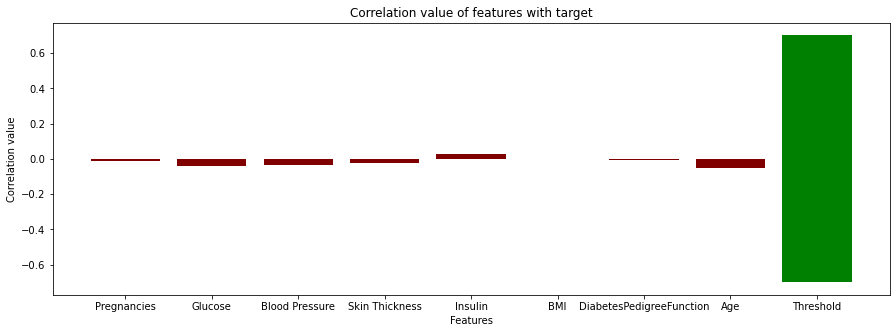

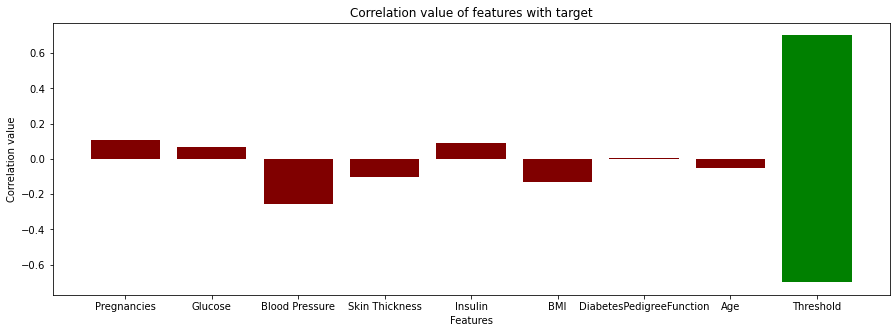

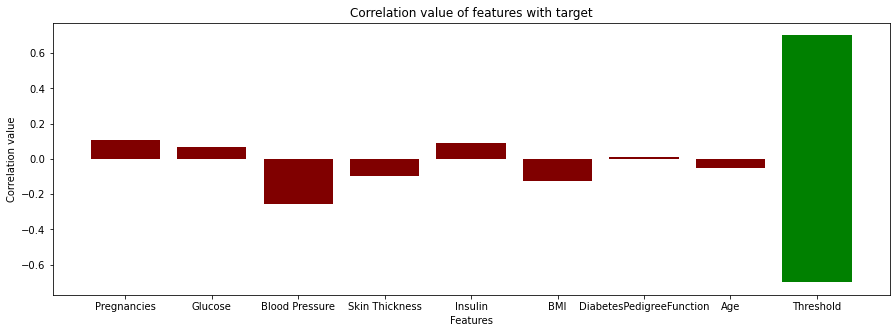

In [35]:
fig=mp.figure(figsize=(15, 5))
features1.corrwith(target)
ax=fig.add_subplot(1,1,1)
mp.bar(features.columns,features1.corrwith(target), color ='maroon')
mp.bar("Threshold",0.7, color ='green',)
mp.bar("Threshold",-0.7, color ='green',)
mp.xlabel("Features")
mp.ylabel("Correlation value")
mp.title("Correlation value of features with target")
mp.show()



fig=mp.figure(figsize=(15, 5))
features2.corrwith(target)
ax=fig.add_subplot(1,1,1)
mp.bar(features.columns,features2.corrwith(target), color ='maroon')
mp.bar("Threshold",0.7, color ='green',)
mp.bar("Threshold",-0.7, color ='green',)
mp.xlabel("Features")
mp.ylabel("Correlation value")
mp.title("Correlation value of features with target")
mp.show()

fig=mp.figure(figsize=(15, 5))
features3.corrwith(target)
ax=fig.add_subplot(1,1,1)
mp.bar(features.columns,features3.corrwith(target), color ='maroon')
mp.bar("Threshold",0.7, color ='green',)
mp.bar("Threshold",-0.7, color ='green',)
mp.xlabel("Features")
mp.ylabel("Correlation value")
mp.title("Correlation value of features with target")
mp.show()




#### Dropping any feature with mores than 0.7 correlation value.

In [36]:
for i in range(len(features1.corrwith(target))):
    if abs(features1.corrwith(target)[i])>=0.7:
        features1.drop(columns=[i])
     

In [37]:
for i in range(len(features2.corrwith(target))):
    if abs(features2.corrwith(target)[i])>=0.7:
        features2.drop(columns=[i])
        

In [38]:
for i in range(len(features3.corrwith(target))):
    if abs(features3.corrwith(target)[i])>=0.7:
        features3.drop(columns=[i])
        

### None of the features were dropped

### We find correlation within features

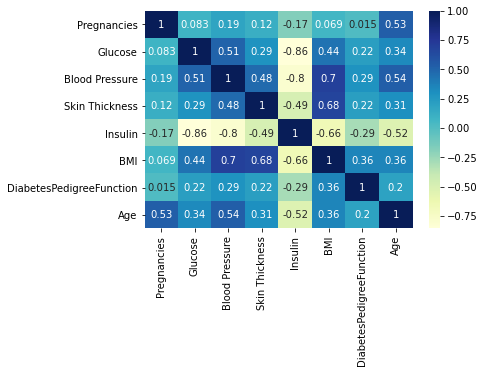

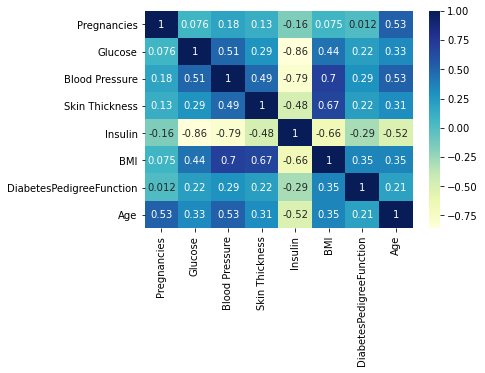

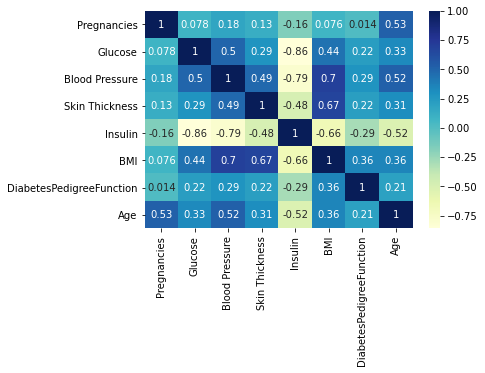

In [39]:
dataplot = sb.heatmap(features1.corr(), cmap="YlGnBu", annot=True)
mp.show()

dataplot = sb.heatmap(features2.corr(), cmap="YlGnBu", annot=True)
mp.show()

dataplot = sb.heatmap(features3.corr(), cmap="YlGnBu", annot=True)
mp.show()

### Dropping any feature with mores than 0.7 correlation value.

In [40]:
todrop=[]
for i in range(features1.corr().shape[0]):
    for j in range(i+1,features1.corr().shape[1]):
        if abs(features1.corr()[features1.columns[i]][features1.columns[j]]) >= 0.7 and i!=j:
            todrop.append(i)
            
todrop=list(set(todrop))
print(todrop)

for i in todrop:
    temp=features.columns[i]
    print("Dropping ",temp, " column")
    features1=features1.drop([temp],axis=1)

[1, 2]
Dropping  Glucose  column
Dropping  Blood Pressure  column


In [41]:
features1

,Pregnancies,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.029699,0.173245,0.465288,0.166316,0.003104,0.247493
1,0.006604,0.191522,0.620794,0.175672,0.002318,0.204730
2,0.036241,0.117783,0.425831,0.105552,0.003044,0.144964
3,0.006612,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.152367,0.731361,0.187629,0.005229,0.143660
...,...,...,...,...,...,...
719,0.042321,0.203141,0.761779,0.139236,0.000724,0.266623
720,0.009544,0.128840,0.696690,0.175604,0.001622,0.128840
721,0.026915,0.123811,0.602905,0.141037,0.001319,0.161492
722,0.005280,0.142570,0.591401,0.158939,0.001843,0.248177


In [42]:
todrop=[]
for i in range(features2.corr().shape[0]):
    for j in range(i+1,features2.corr().shape[1]):
        if abs(features2.corr()[features2.columns[i]][features2.columns[j]]) >= 0.7 and i!=j:
            todrop.append(i)
            
todrop=list(set(todrop))

for i in todrop:
    temp=features2.columns[i]
    todrop.remove(i)
    print("Dropping ",temp, " column")
    features2=features2.drop([temp],axis=1)

Dropping  Glucose  column


In [43]:
todrop=[]
for i in range(features3.corr().shape[0]):
    for j in range(i+1,features3.corr().shape[1]):
        if abs(features3.corr()[features3.columns[i]][features3.columns[j]]) >= 0.7 and i!=j:
            todrop.append(i)
            
todrop=list(set(todrop))

for i in todrop:
    temp=features3.columns[i]
    print("Dropping ",temp, " column")
    features3=features3.drop([temp],axis=1)

Dropping  Glucose  column
Dropping  Skin Thickness  column


In [44]:
features3

,Pregnancies,Blood Pressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.029699,0.356390,0.465288,0.166316,0.003104,0.247493
1,0.006604,0.435877,0.620794,0.175672,0.002318,0.204730
2,0.036241,0.289927,0.425831,0.105552,0.003044,0.144964
3,0.006612,0.436392,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.174134,0.731361,0.187629,0.005224,0.143660
...,...,...,...,...,...,...
763,0.042321,0.321640,0.761779,0.139236,0.000724,0.266623
764,0.009544,0.334030,0.696690,0.175604,0.001622,0.128840
765,0.026915,0.387582,0.602905,0.141037,0.001319,0.161492
766,0.005280,0.316822,0.591401,0.158939,0.001843,0.248177


## Classification Models

In [45]:
x1train,x1test,y1train,y1test=train_test_split(features1, target1,random_state=88)
x2train,x2test,y2train,y2test=train_test_split(features2, target2,random_state=88)
x3train,x3test,y3train,y3test=train_test_split(features3, target3,random_state=88)

In [46]:
tab1= [[0 for i in range(5)] for j in range(6)] 
tab2= [[0 for i in range(5)] for j in range(6)] 
tab3= [[0 for i in range(5)] for j in range(6)] 

tabs=['tab1','tab2','tab3']
features=['features1','features2','features3']
targets=['target1','target2','target3']
xtrain=['x1train','x2train','x3train']
ytrain=['y1train','y2train','y3train']
xtest=['x1test','x2test','x3test']
ytest=['y1test','y2test','y3test']

models=['Decision Tree','Naive Bayes','ANN','SVM','Random Forest','KNN']

for i in tabs:
    for j in range(len(models)):
        eval(i)[j][0]=models[j]

## Decision Tree

In [47]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    DT=DecisionTreeClassifier(random_state=9)
    scores = cross_val_score(DT, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    DT.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=DT.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[0][1:5]=temp

## Naive Bayes

In [48]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    NB=GaussianNB()
    scores = cross_val_score(NB, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    NB.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=NB.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[1][1:5]=temp

## ANN

In [49]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    ANN=MLPClassifier(hidden_layer_sizes=(2,3),random_state=5,verbose=False,learning_rate_init=0.01)
    scores = cross_val_score(ANN, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    ANN.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=ANN.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[2][1:5]=temp

## SVM

In [50]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    svc=SVC(kernel='linear')
    svc.fit(x1train,y1train)
    scores = cross_val_score(svc, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    svc.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=svc.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[3][1:5]=temp

## Random Forest

In [51]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    rf=RandomForestClassifier(random_state=0)
    scores = cross_val_score(rf, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    rf.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=rf.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[4][1:5]=temp

In [52]:
len(ypred)

192

## KNN

In [53]:
for i in range(3):
    cv = KFold(n_splits=10, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(x1train,y1train)
    scores = cross_val_score(knn, eval(features[i]), eval(targets[i]), scoring='accuracy', cv=cv, n_jobs=-1)
    knn.fit(eval(xtrain[i]),eval(ytrain[i]))
    ypred=knn.predict(eval(xtest[i]))
    temp=[scores.mean(),f1_score(eval(ytest[i]), ypred,average='weighted'),recall_score(eval(ytest[i]), ypred,average='weighted'),precision_score(eval(ytest[i]), ypred,average='weighted')]
    eval(tabs[i])[5][1:5]=temp

## Evaluation

In [54]:
tab1=pd.DataFrame(tab1)
tab2=pd.DataFrame(tab2)
tab3=pd.DataFrame(tab3)

for i in tabs:
    eval(i).rename(columns={0: "Model", 1: "Accuracy", 2 : "Fscore", 3 : "Recall", 4 : "Precision"}, inplace=True)

In [55]:
tab1

,Model,Accuracy,Fscore,Recall,Precision
0,Decision Tree,0.567865,0.590983,0.580110,0.608233
1,Naive Bayes,0.609094,0.623274,0.613260,0.640157
2,ANN,0.655898,0.564222,0.690608,0.476939
3,SVM,0.655993,0.564222,0.690608,0.476939
4,Random Forest,0.668550,0.656210,0.668508,0.649767
5,KNN,0.650799,0.624309,0.624309,0.624309


In [56]:
tab2

,Model,Accuracy,Fscore,Recall,Precision
0,Decision Tree,0.632895,0.589361,0.588542,0.590210
1,Naive Bayes,0.619856,0.604506,0.593750,0.627532
2,ANN,0.651008,0.540012,0.671875,0.451416
3,SVM,0.650786,0.540012,0.671875,0.451416
4,Random Forest,0.692755,0.706507,0.718750,0.705177
5,KNN,0.652375,0.657682,0.661458,0.654790


In [57]:
tab3

,Model,Accuracy,Fscore,Recall,Precision
0,Decision Tree,0.648360,0.673760,0.671875,0.675967
1,Naive Bayes,0.642071,0.603920,0.598958,0.610374
2,ANN,0.651128,0.540012,0.671875,0.451416
3,SVM,0.650957,0.540012,0.671875,0.451416
4,Random Forest,0.697813,0.671649,0.687500,0.668622
5,KNN,0.664012,0.695270,0.697917,0.693239


In [58]:
mean_Accuracy=(tab1['Accuracy']+tab2["Accuracy"]+tab3["Accuracy"])/3
mean_Fscore=(tab1['Fscore']+tab2["Fscore"]+tab3["Fscore"])/3
mean_Recall=(tab1['Recall']+tab2["Recall"]+tab3["Recall"])/3
mean_Precision=(tab1['Precision']+tab2["Precision"]+tab3["Precision"])/3

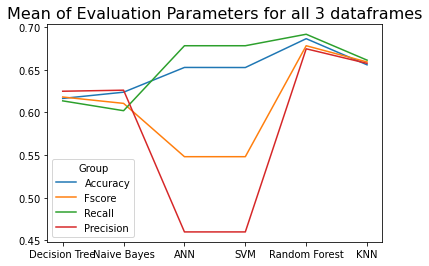

<Figure size 14400x504 with 0 Axes>

In [59]:
mp.plot(tab1['Model'],mean_Accuracy, label='Accuracy')
mp.plot(tab1['Model'],mean_Fscore, label='Fscore')
mp.plot(tab1['Model'],mean_Recall, label='Recall')
mp.plot(tab1['Model'],mean_Precision, label='Precision')
mp.legend(title='Group')
mp.title('Mean of Evaluation Parameters for all 3 dataframes', fontsize=16)
mp.figure(figsize=(200,7)) 
mp.show()

<AxesSubplot:title={'center':'DATA FRAME #1'}, xlabel='Model'>

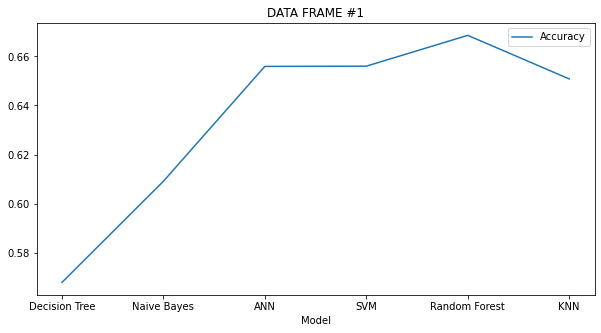

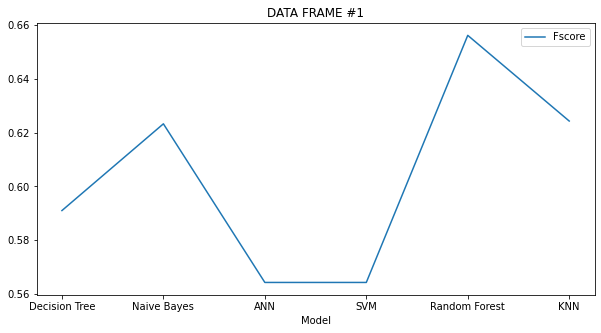

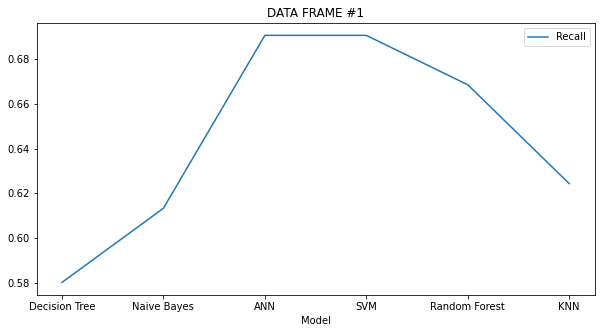

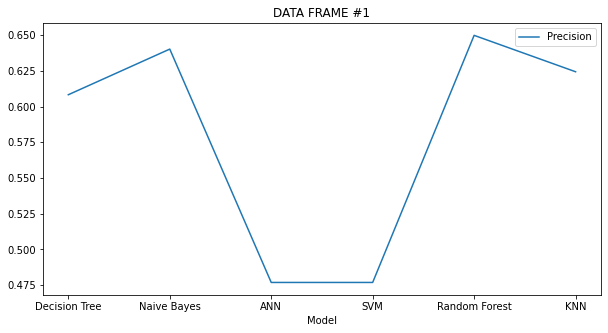

In [60]:
tab1.plot(x ='Model', y='Accuracy', kind = 'line', figsize=(10,5),title="DATA FRAME #1")
tab1.plot(x ='Model', y='Fscore', kind = 'line', figsize=(10,5),title="DATA FRAME #1")
tab1.plot(x ='Model', y='Recall', kind = 'line', figsize=(10,5),title="DATA FRAME #1")
tab1.plot(x ='Model', y='Precision', kind = 'line', figsize=(10,5),title="DATA FRAME #1")

<AxesSubplot:title={'center':'DATA FRAME #2'}, xlabel='Model'>

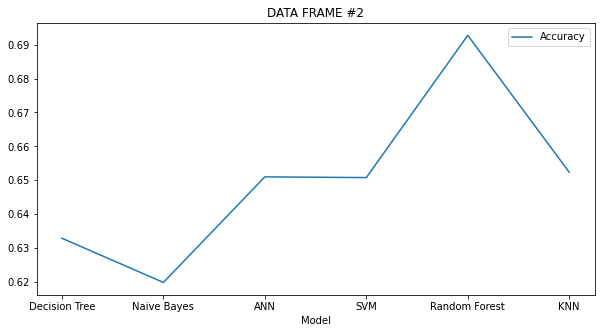

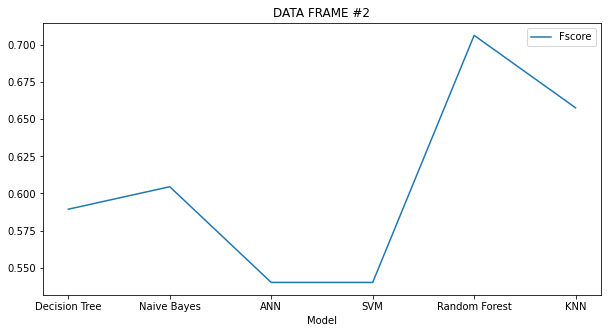

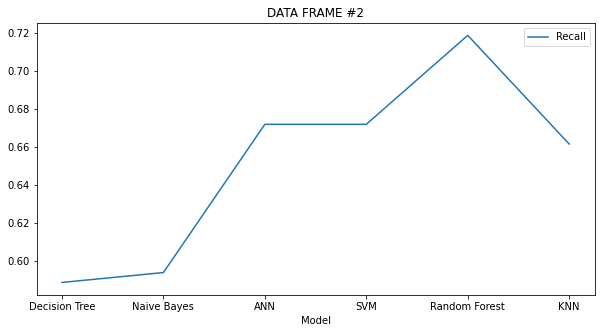

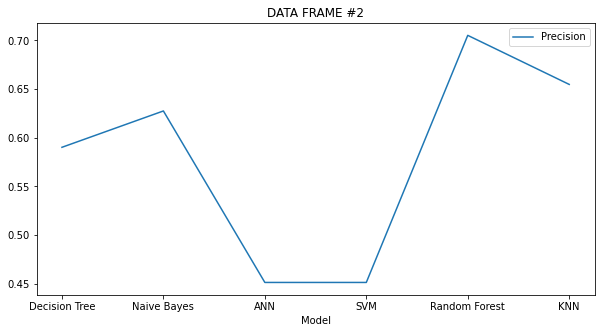

In [61]:
tab2.plot(x ='Model', y='Accuracy', kind = 'line', figsize=(10,5),title="DATA FRAME #2")
tab2.plot(x ='Model', y='Fscore', kind = 'line', figsize=(10,5),title="DATA FRAME #2")
tab2.plot(x ='Model', y='Recall', kind = 'line', figsize=(10,5),title="DATA FRAME #2")
tab2.plot(x ='Model', y='Precision', kind = 'line', figsize=(10,5),title="DATA FRAME #2")

<AxesSubplot:title={'center':'DATA FRAME #3'}, xlabel='Model'>

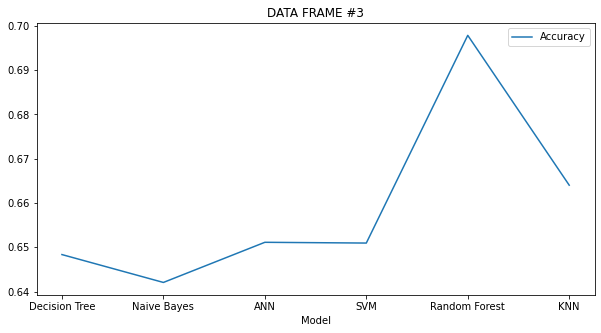

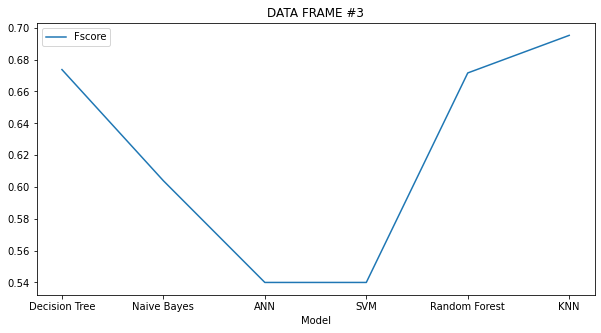

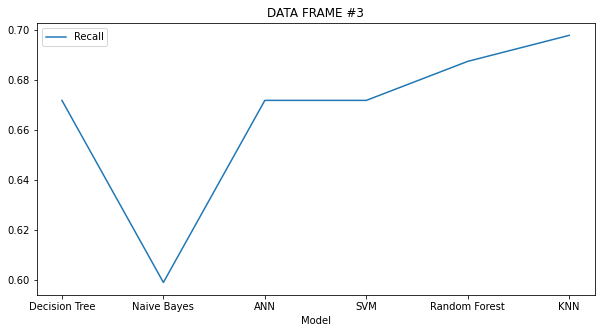

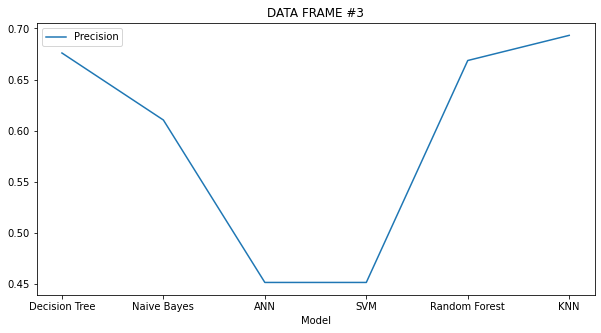

In [62]:
tab3.plot(x ='Model', y='Accuracy', kind = 'line', figsize=(10,5),title="DATA FRAME #3")
tab3.plot(x ='Model', y='Fscore', kind = 'line', figsize=(10,5),title="DATA FRAME #3")
tab3.plot(x ='Model', y='Recall', kind = 'line', figsize=(10,5),title="DATA FRAME #3")
tab3.plot(x ='Model', y='Precision', kind = 'line', figsize=(10,5),title="DATA FRAME #3")

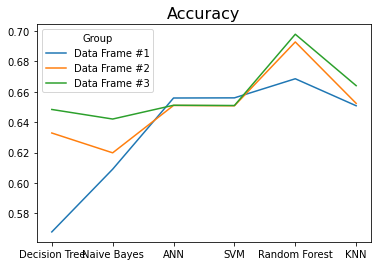

<Figure size 14400x504 with 0 Axes>

In [63]:
mp.plot(tab1['Model'],tab1['Accuracy'], label='Data Frame #1')
mp.plot(tab2['Accuracy'], label='Data Frame #2')
mp.plot(tab3['Accuracy'],label='Data Frame #3')
mp.legend(title='Group')
mp.title('Accuracy', fontsize=16)
mp.figure(figsize=(200,7)) 
mp.show()

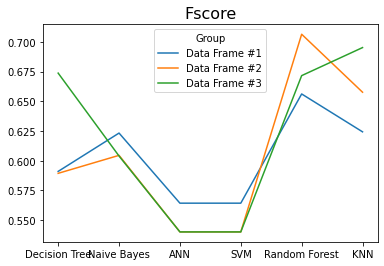

<Figure size 14400x504 with 0 Axes>

In [64]:
mp.plot(tab1['Model'],tab1['Fscore'], label='Data Frame #1')
mp.plot(tab2['Fscore'], label='Data Frame #2')
mp.plot(tab3['Fscore'],label='Data Frame #3')
mp.legend(title='Group')
mp.title('Fscore', fontsize=16)
mp.figure(figsize=(200,7)) 
mp.show()

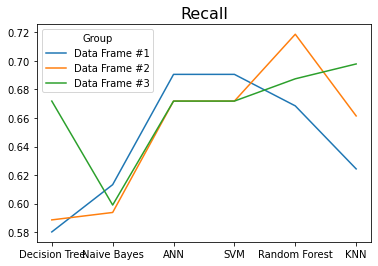

<Figure size 14400x504 with 0 Axes>

In [65]:
mp.plot(tab1['Model'],tab1['Recall'], label='Data Frame #1')
mp.plot(tab2['Recall'], label='Data Frame #2')
mp.plot(tab3['Recall'],label='Data Frame #3')
mp.legend(title='Group')
mp.title('Recall', fontsize=16)
mp.figure(figsize=(200,7)) 
mp.show()

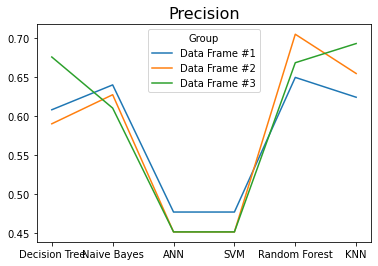

<Figure size 14400x504 with 0 Axes>

In [66]:
mp.plot(tab1['Model'],tab1['Precision'], label='Data Frame #1')
mp.plot(tab2['Precision'], label='Data Frame #2')
mp.plot(tab3['Precision'],label='Data Frame #3')
mp.legend(title='Group')
mp.title('Precision', fontsize=16)
mp.figure(figsize=(200,7)) 
mp.show()